In [ ]:
%pip install scikit-learn pandas numpy matplotlib seaborn




You should consider upgrading via the 'c:\users\admin-pc\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import sklearn
print("sklearn version:", sklearn.__version__)
print("All libraries ready!")


sklearn version: 1.3.2
All libraries ready!


In [2]:
# Step 3: Install and import libraries (import part)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Step 4: Load dataset
df = pd.read_csv("house_prices.csv")

print("First 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   area  bedrooms  age  distance  price
0  2048         4   11         7     89
1  1730         4   14         4     54
2  2123         3   16         8     59
3  2561         4    9         3     82
4  1682         3   13         1     53



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      155 non-null    int64
 1   bedrooms  155 non-null    int64
 2   age       155 non-null    int64
 3   distance  155 non-null    int64
 4   price     155 non-null    int64
dtypes: int64(5)
memory usage: 6.2 KB
None

Summary statistics:
              area    bedrooms         age    distance       price
count   155.000000  155.000000  155.000000  155.000000  155.000000
mean   1761.122581    2.980645   11.548387    4.606452   53.025806
std     464.829229    1.136587    6.133995    2.426843   20.416745
min     500.000000    1.000000    1.000000    1.000000   20.000000
25%    1469.000000    2.000000    7.000000    3.000000   39.000000
50%    1782.000000    3.000000   11.000000    4.000000   50.000000
75%    2019.000000    4.000000   16.000000    6.000000   64.500000
max    3031.000000    

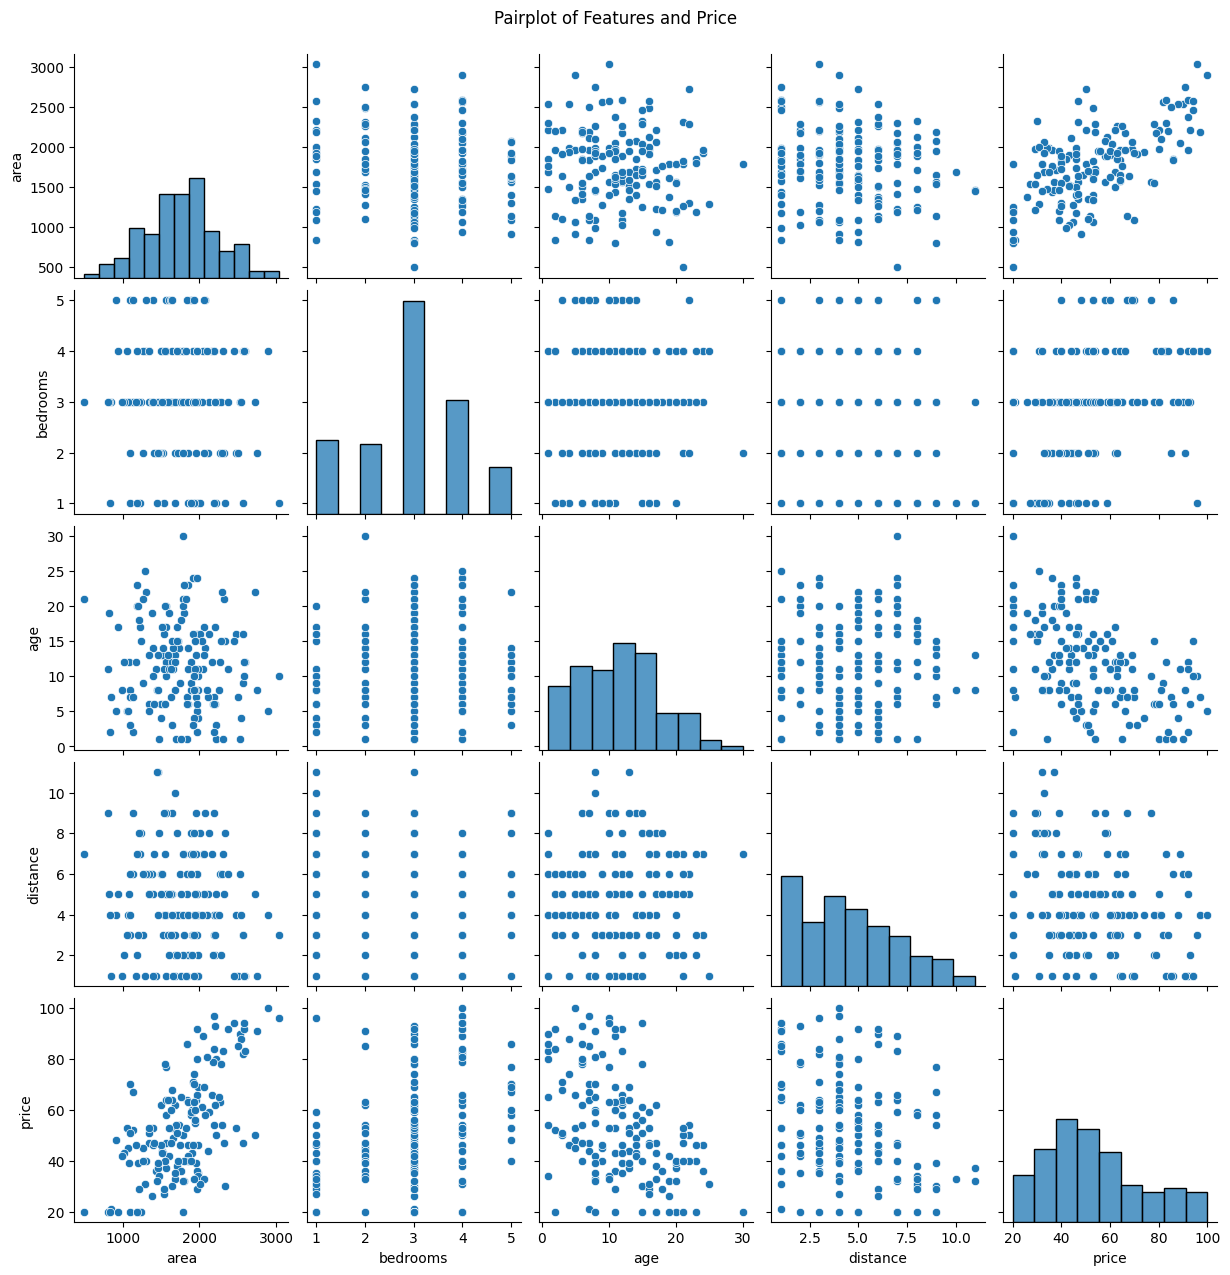

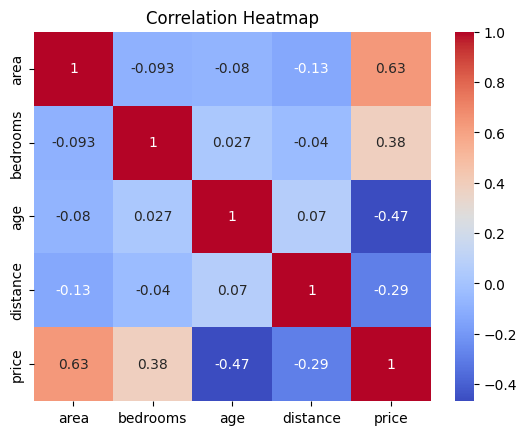

In [4]:
# Step 5: Understand the data (EDA)
print("\nDataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isna().sum())

# Some basic visual EDA
sns.pairplot(df)
plt.suptitle("Pairplot of Features and Price", y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# Step 6: Handle missing values (if any) using mean
df_filled = df.copy()
for col in df_filled.columns:
    if df_filled[col].isna().sum() > 0:
        df_filled[col].fillna(df_filled[col].mean(), inplace=True)

print("\nMissing values after filling with mean:")
print(df_filled.isna().sum())



Missing values after filling with mean:
area        0
bedrooms    0
age         0
distance    0
price       0
dtype: int64


In [6]:
# Step 7: Select features (X) and label (y)
# Features: area, bedrooms, age, distance
# Label: price
X = df_filled[["area", "bedrooms", "age", "distance"]]
y = df_filled["price"]

print("\nFeature sample:")
print(X.head())
print("\nLabel sample:")
print(y.head())



Feature sample:
   area  bedrooms  age  distance
0  2048         4   11         7
1  1730         4   14         4
2  2123         3   16         8
3  2561         4    9         3
4  1682         3   13         1

Label sample:
0    89
1    54
2    59
3    82
4    53
Name: price, dtype: int64


In [7]:
# Step 8: Split data into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)



Train shape: (124, 4) (124,)
Test shape: (31, 4) (31,)


In [8]:
# Step 9: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel coefficients (for features in order [area, bedrooms, age, distance]):")
print(model.coef_)
print("Model intercept:")
print(model.intercept_)



Model coefficients (for features in order [area, bedrooms, age, distance]):
[ 0.02714952  6.99056639 -1.46222914 -1.66618887]
Model intercept:
9.312864382072306


In [9]:
# Step 10: Predict on test data
y_pred = model.predict(X_test)

print("\nFirst 5 actual vs predicted:")
comparison_df = pd.DataFrame({
    "Actual": y_test.values[:5],
    "Predicted": y_pred[:5]
})
print(comparison_df)



First 5 actual vs predicted:
   Actual  Predicted
0      69  66.235609
1      42  43.961465
2      50  63.794175
3      49  49.720098
4      92  68.574426


In [10]:
# Step 11: Evaluate model - MSE, MAE, R^2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)



Evaluation Metrics:
Mean Squared Error (MSE): 96.766376794192
Mean Absolute Error (MAE): 7.720841155442968
R-squared (R^2): 0.6009214391196451


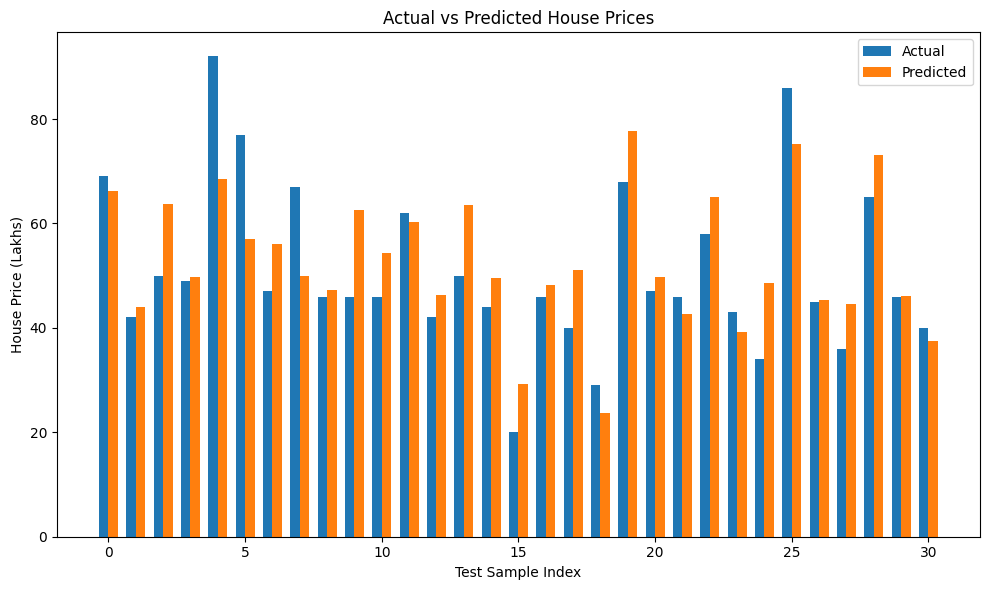

In [11]:
# Step 12: Show result in bar graph (Actual vs Predicted for test set)

# Reset index for proper alignment
y_test_reset = y_test.reset_index(drop=True)

indices = np.arange(len(y_test_reset))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(indices - width/2, y_test_reset, width=width, label="Actual")
plt.bar(indices + width/2, y_pred, width=width, label="Predicted")

plt.xlabel("Test Sample Index")
plt.ylabel("House Price (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.tight_layout()
plt.show()
